Hospital Bloodstream Infection Dataset

Project Title: Identifying Key Risk Factors for Central Line-Associated Bloodstream Infections (CLABSIs)

Author: Aiswarya Jayaprakash

Tools: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

Introduction:

Central Line-Associated Bloodstream Infections (CLABSIs) are serious infections that occur when germs enter the bloodstream through a central line (central venous catheter. A central line  is a catheter (tube) that healthcare providers often place in a large vein in the neck, chest or groin to give medication or fluids or to collect blood for medical tests. Central lines are different from peripheral IVs (shorter IVs placed in the hand, arm or foot for vein access); central lines access a major vein close to the heart, can remain in place for weeks or months, and are much more likely to be a source of serious infection. Central lines are commonly used in intensive care units. CLABSIs result in thousands of deaths each year and billions of dollars in added costs however they are preventable. These infections are a significant cause of morbidity and mortality in hospitals.

Problem:
The goal of this project is to identify the key risk factors contributing to CLABSIs using machine learning techniques.
By analyzing patient and clinical data, we aim to predict the occurrence of positive gram-positive infections.

Importance:
This analysis can help improve hospital practices, reduce CLABSI rates, and enhance patient outcomes.

Goal of the project: To build a machine learning model that identifies the primary risk factors of CLABSIs and predicts the likelihood of gram-positive infections.

Key Metrics: Accuracy, Precision, Recall, F1-Score, Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
    
Dataset Description:
The dataset contains information about hospital patients, including demographics, catheter usage, and clinical metrics. 
It includes categorical and numerical data.

Key Features:
* Patient demographics (Age, Gender, Ethnicity)
* Clinical indicators (Diabetes, White Blood Cell Count, C-Reactive Protein)
* Infection indicators (PositiveGramPositive, PositiveGramNegative)

Target Variable:
* PositiveGramPositive and PositiveGramNegative

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [2]:
# Load the dataset
file_path = "E:\\Aiswarya\\DSML_Entri\\patient_data.xlsx" # Update the file path if needed
data = pd.read_excel(file_path)
data = data.sample(n=20000, random_state=42)  # Randomly select 20,000 rows
print("Dataset shape after slicing:", data.shape)
data

Dataset shape after slicing: (20000, 24)


PatientName        Age  Gender         Ethnicity  Diabetes  \
33553         Gina Jackson      adult  female          Hispanic      True   
9427           Susan Keith     infant  female         Caucasian      True   
199          Sabrina Walsh     infant    male  African American      True   
12447          Andrea King      adult    male             Asian     False   
39489        Joshua Gordon  pediatric  female         Caucasian      True   
...                    ...        ...     ...               ...       ...   
14324          Erin Herman      adult   other             Asian     False   
43453     Jennifer Trevino    elderly   other             Asian     False   
29499      Tamara Williams    elderly  female  African American      True   
42681  Timothy Jackson DVM     infant   other             Asian      True   
42326         Jenna Harvey    elderly    male  African American     False   

       Immunocompromised  ChronicRenalFailure                CatheterType  \
33553               True                 True            urinary catheter   
9427                True                False  peripheral venous catheter   
199                 True                 True            urinary catheter   
12447               True                 True     central venous catheter   
39489              False                 True  peripheral venous catheter   
...                  ...                  ...                         ...   
14324              False                False  peripheral venous catheter   
43453              False                 True     central venous catheter   
29499              False                False     central venous catheter   
42681              False                False            urinary catheter   
42326              False                False            urinary catheter   

      InsertionSite  Duration  ...  CReactiveProtein  PositiveGramPositive  \
33553         other        13  ...               7.2                  True   
9427        jugular        30  ...               7.9                  True   
199         jugular        21  ...               6.9                 False   
12447         other        23  ...               9.5                 False   
39489         other         5  ...               4.1                 False   
...             ...       ...  ...               ...                   ...   
14324    subclavian        25  ...               7.0                 False   
43453         other        11  ...               2.8                  True   
29499    subclavian        19  ...               4.6                  True   
42681         other        19  ...               4.4                  True   
42326         other         9  ...               6.3                 False   

       PositiveGramNegative  Temperature  HeartRate  RespiratoryRate  \
33553                  True         37.5         75               15   
9427                  False         37.6         89               19   
199                    True         38.6         66               12   
12447                 False         37.3         60               13   
39489                 False         38.8         68               15   
...                     ...          ...        ...              ...   
14324                 False         36.3         67               22   
43453                 False         38.6         69               13   
29499                 False         37.3         64               19   
42681                 False         39.7         76               18   
42326                 False         36.6         82               23   

       NutritionalStatus  LengthOfStay  Pneumonia  UrinaryTractInfection  
33553       malnourished             9      False                   True  
9427        malnourished            28      False                   True  
199         malnourished             2       True                   True  
12447     well-nourished             8      False              

In [3]:
print(data.head())
print(data.tail())

         PatientName        Age  Gender         Ethnicity  Diabetes  \
33553   Gina Jackson      adult  female          Hispanic      True   
9427     Susan Keith     infant  female         Caucasian      True   
199    Sabrina Walsh     infant    male  African American      True   
12447    Andrea King      adult    male             Asian     False   
39489  Joshua Gordon  pediatric  female         Caucasian      True   

       Immunocompromised  ChronicRenalFailure                CatheterType  \
33553               True                 True            urinary catheter   
9427                True                False  peripheral venous catheter   
199                 True                 True            urinary catheter   
12447               True                 True     central venous catheter   
39489              False                 True  peripheral venous catheter   

      InsertionSite  Duration  ...  CReactiveProtein  PositiveGramPositive  \
33553         other        13  .

In [4]:
# Describe the Dataset
# Dataset overview
print("\nDataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 33553 to 42326
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientName            20000 non-null  object 
 1   Age                    20000 non-null  object 
 2   Gender                 20000 non-null  object 
 3   Ethnicity              20000 non-null  object 
 4   Diabetes               20000 non-null  bool   
 5   Immunocompromised      20000 non-null  bool   
 6   ChronicRenalFailure    20000 non-null  bool   
 7   CatheterType           20000 non-null  object 
 8   InsertionSite          20000 non-null  object 
 9   Duration               20000 non-null  int64  
 10  CatheterCarePractices  20000 non-null  bool   
 11  DailyDressingChanges   20000 non-null  bool   
 12  ChlorhexidineBathing   20000 non-null  bool   
 13  WhiteBloodCellCount    20000 non-null  float64
 14  CReactiveProtein       20000 non-

In [5]:
# Handling Duplicates
# Check for duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


In [6]:
# Check for Null Values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 PatientName              0
Age                      0
Gender                   0
Ethnicity                0
Diabetes                 0
Immunocompromised        0
ChronicRenalFailure      0
CatheterType             0
InsertionSite            0
Duration                 0
CatheterCarePractices    0
DailyDressingChanges     0
ChlorhexidineBathing     0
WhiteBloodCellCount      0
CReactiveProtein         0
PositiveGramPositive     0
PositiveGramNegative     0
Temperature              0
HeartRate                0
RespiratoryRate          0
NutritionalStatus        0
LengthOfStay             0
Pneumonia                0
UrinaryTractInfection    0
dtype: int64


In [7]:
# Separate numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Duration', 'WhiteBloodCellCount', 'CReactiveProtein', 'Temperature',
       'HeartRate', 'RespiratoryRate', 'LengthOfStay'],
      dtype='object')

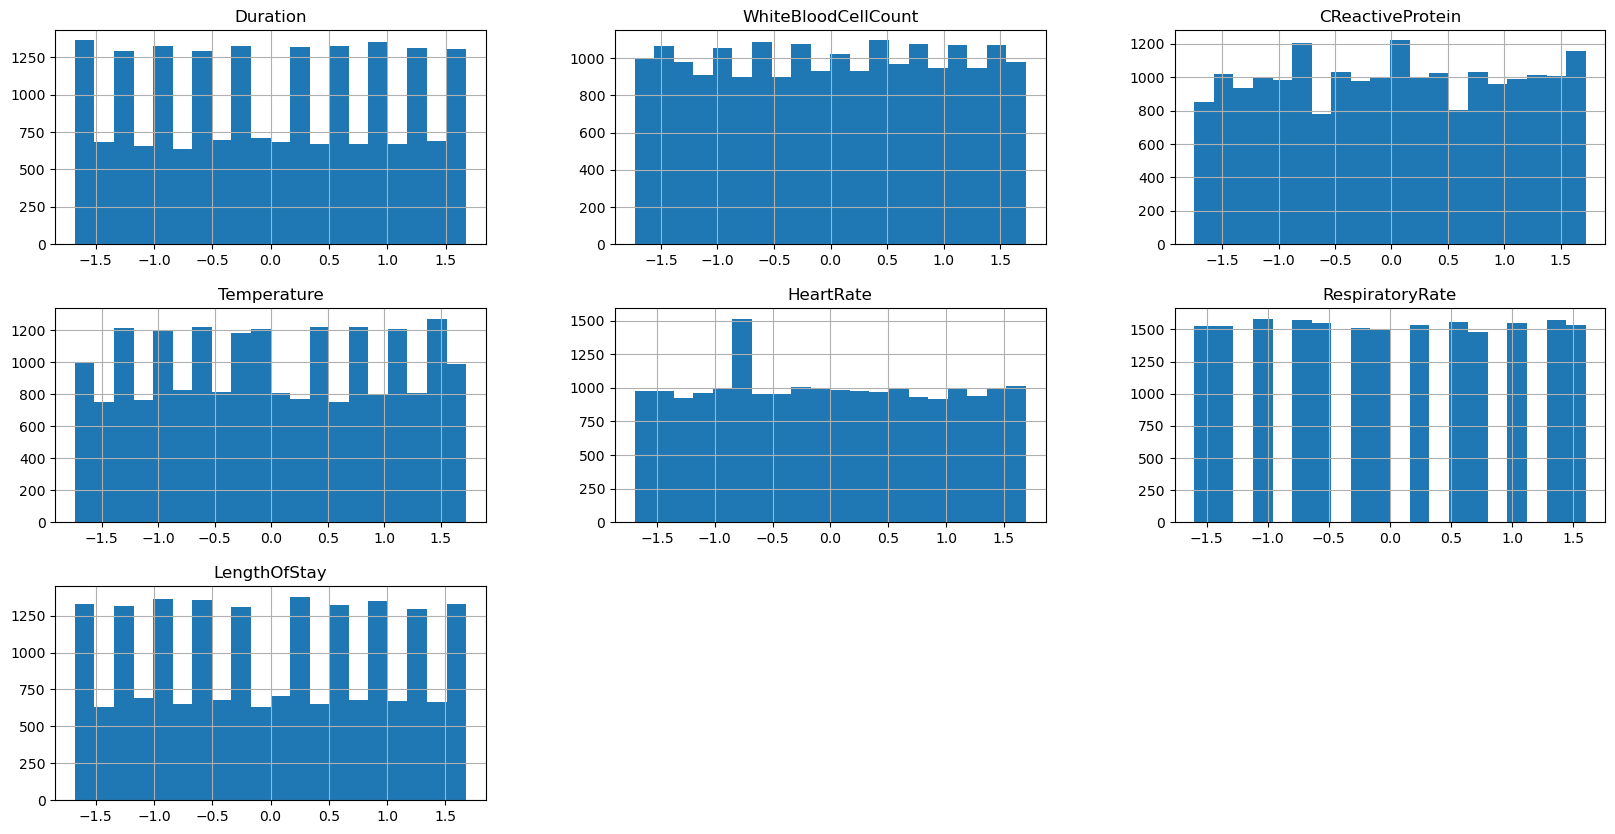

In [8]:
# Scale numerical features
# Apply StandardScaler for standardization
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data[numerical_cols]

# plotting distribution of numerical columns
data[numerical_cols].hist(bins=20, figsize=(20,10))
plt.show()

In [9]:
# Separate categorical columns
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols

Index(['PatientName', 'Age', 'Gender', 'Ethnicity', 'CatheterType',
       'InsertionSite', 'NutritionalStatus'],
      dtype='object')

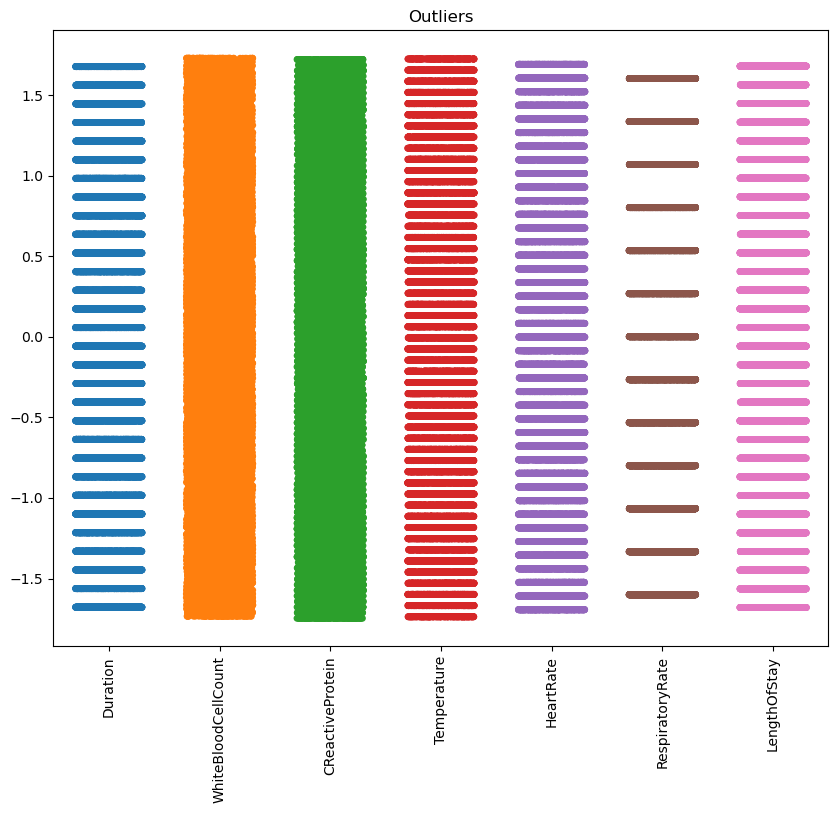

C:\Users\CDFD.DESKTOP-5QLD4SV\AppData\Local\Temp\ipykernel_21676\4112476347.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cols_to_plot.values, labels=cols_to_plot.columns)


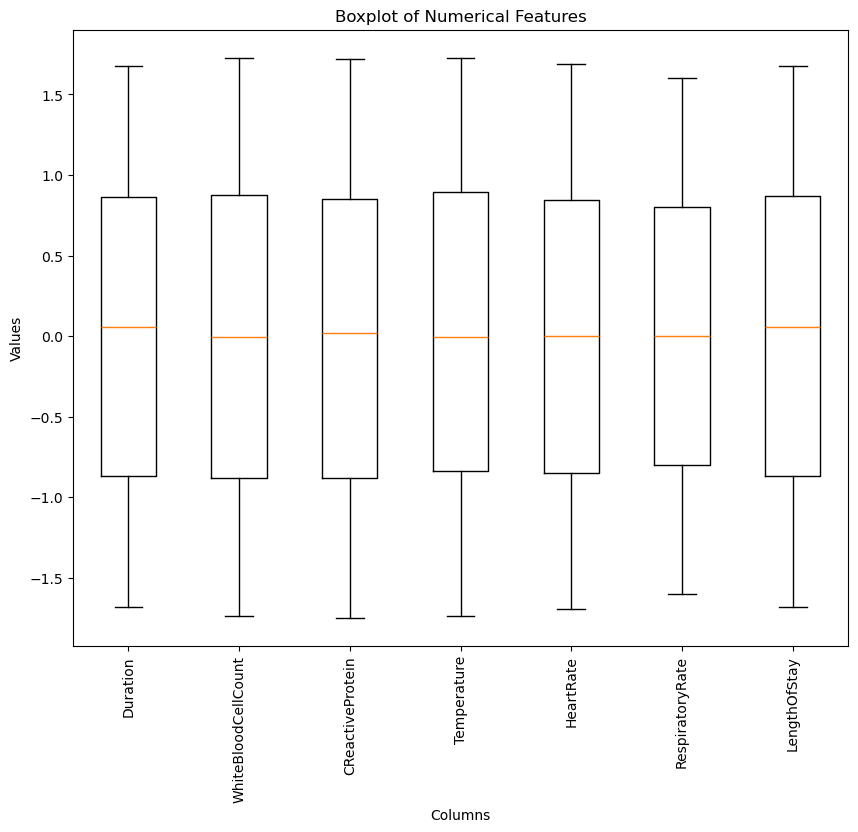

In [10]:
# Remove infinite values if any
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# strip plot of numerical cols to idnetify outliers
plt.figure(figsize=(10, 8))
cols_to_plot = data[numerical_cols]
sns.stripplot(data=cols_to_plot, jitter=0.3, size=5)
plt.title("Outliers")
plt.xticks(rotation=90)
plt.show()

# box plot of numerical cols
plt.figure(figsize=(10, 8))
plt.boxplot(cols_to_plot.values, labels=cols_to_plot.columns)
plt.title("Boxplot of Numerical Features")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Calculate Z-scores for each numerical column
from scipy.stats import zscore
z_scores = data[numerical_cols].apply(zscore)

# Define a threshold for identifying outliers
threshold = 3  # Commonly used threshold (z-score > 3 or < -3 indicates outliers)

# Create a DataFrame to flag outliers
outliers = (z_scores.abs() > threshold)

# Count the number of outliers for each column
outlier_counts = outliers.sum()

# Display results
print("Number of outliers in each numerical column:")
print(outlier_counts)

# Optional: Filter rows with outliers
rows_with_outliers = data[outliers.any(axis=1)]
print(f"\nTotal rows with outliers: {len(rows_with_outliers)}")

# Save the rows with outliers to a CSV (optional)
rows_with_outliers.to_csv("outliers_detected.csv", index=False)

Number of outliers in each numerical column:
Duration               0
WhiteBloodCellCount    0
CReactiveProtein       0
Temperature            0
HeartRate              0
RespiratoryRate        0
LengthOfStay           0
dtype: int64

Total rows with outliers: 0


In [12]:
#defining function to create skewness kurtosis report of numerical features
skew_values = []
skew_types = []
skew_levels = []
kurt_values = []
kurt_types = []

def create_skew_kurt_report(df, features):
    for feature in features:
        skew = df[feature].skew()
        kurt = df[feature].kurt()
        skew_values.append(skew)
        kurt_values.append(kurt)
        
        #determining skewness type (+ve or -ve)
        if skew >= 0:
            skew_types.append('Positive')
        else:
            skew_types.append('Negative')
            
        #determining skewness level (low, moderate or high)
        if skew == 0:
            skew_levels.append('Symmetrical')
        elif skew < -1 or skew > 1:
            skew_levels.append('High')
        elif (skew >= -1 and skew < -0.5) or (skew >= 0.5 and skew < 1):
            skew_levels.append('Moderate')
        else:
            skew_levels.append('Low')
            
        #determining kurtosis type (Platykurtic, Leptokurtic, Mesokurtic)
        if kurt < 3:
            kurt_types.append('Platykurtic')
        elif kurt > 3:
            kurt_types.append('Leptokurtic')
        else:
            kurt_types.append('Mesokurtic')
            
    report = pd.DataFrame({
        'Feature': features,
        'Skewness': skew_values,
        'Skewness Type': skew_types,
        'Skewness Level': skew_levels,
        'Kurtosis': kurt_values,
        'Kurtosis Type': kurt_types
    })
    
    report.set_index('Feature', inplace=True)

    return report

report = create_skew_kurt_report(data, numerical_cols)

#function to highlight 'Skewness Level' cell
def highlight_cells(val):
    if val == 'High':
        color = '#f5b7b1'  
    elif val == 'Moderate':
        color = '#f9e79f'  
    else:
        color = '#abebc6'  
    
    return f'background-color: {color}'

report = report.style.applymap(highlight_cells, subset=['Skewness Level'])
report

C:\Users\CDFD.DESKTOP-5QLD4SV\AppData\Local\Temp\ipykernel_21676\2757986169.py:65: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  report = report.style.applymap(highlight_cells, subset=['Skewness Level'])


The dataset does not exhibit significant skewness. All features have nearly symmetrical distributions with "Low" skewness levels. There is no need to apply any skewness correction methods (e.g., log transformations) since the skewness is already minimal. Attempting to apply transformation on the features could potentially over-transform the data.

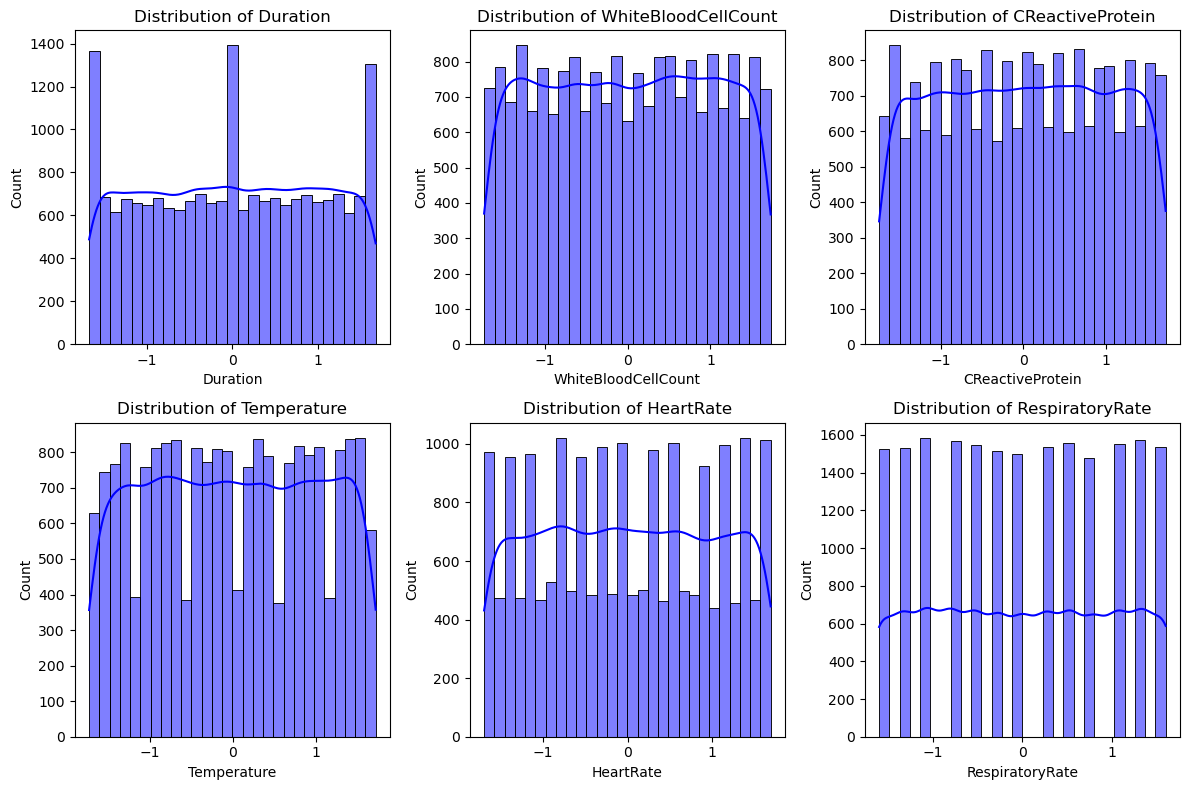

In [13]:
#Step 3: Data Visualization
#1. Univariate Analysis
# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols[:6]):  # Plot 6 features
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

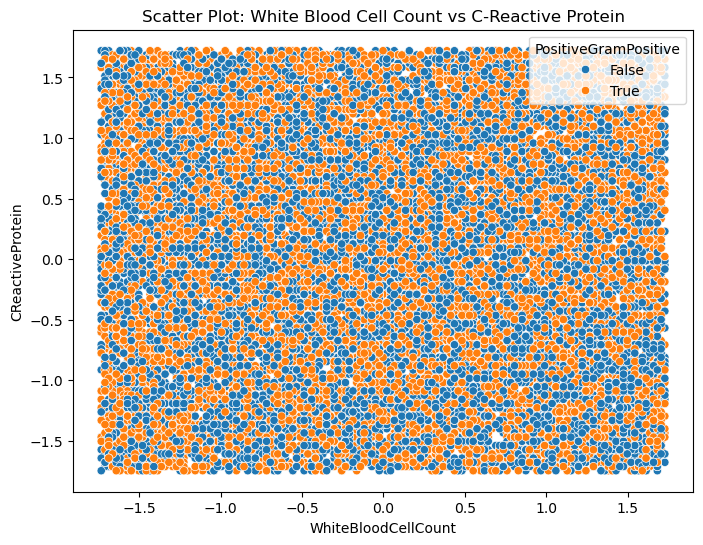

In [14]:
#2. Bivariate Analysis
# Scatter plot between WhiteBloodCellCount and C-Reactive Protein
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WhiteBloodCellCount', y='CReactiveProtein', hue='PositiveGramPositive', data=data)
plt.title("Scatter Plot: White Blood Cell Count vs C-Reactive Protein")
plt.show()

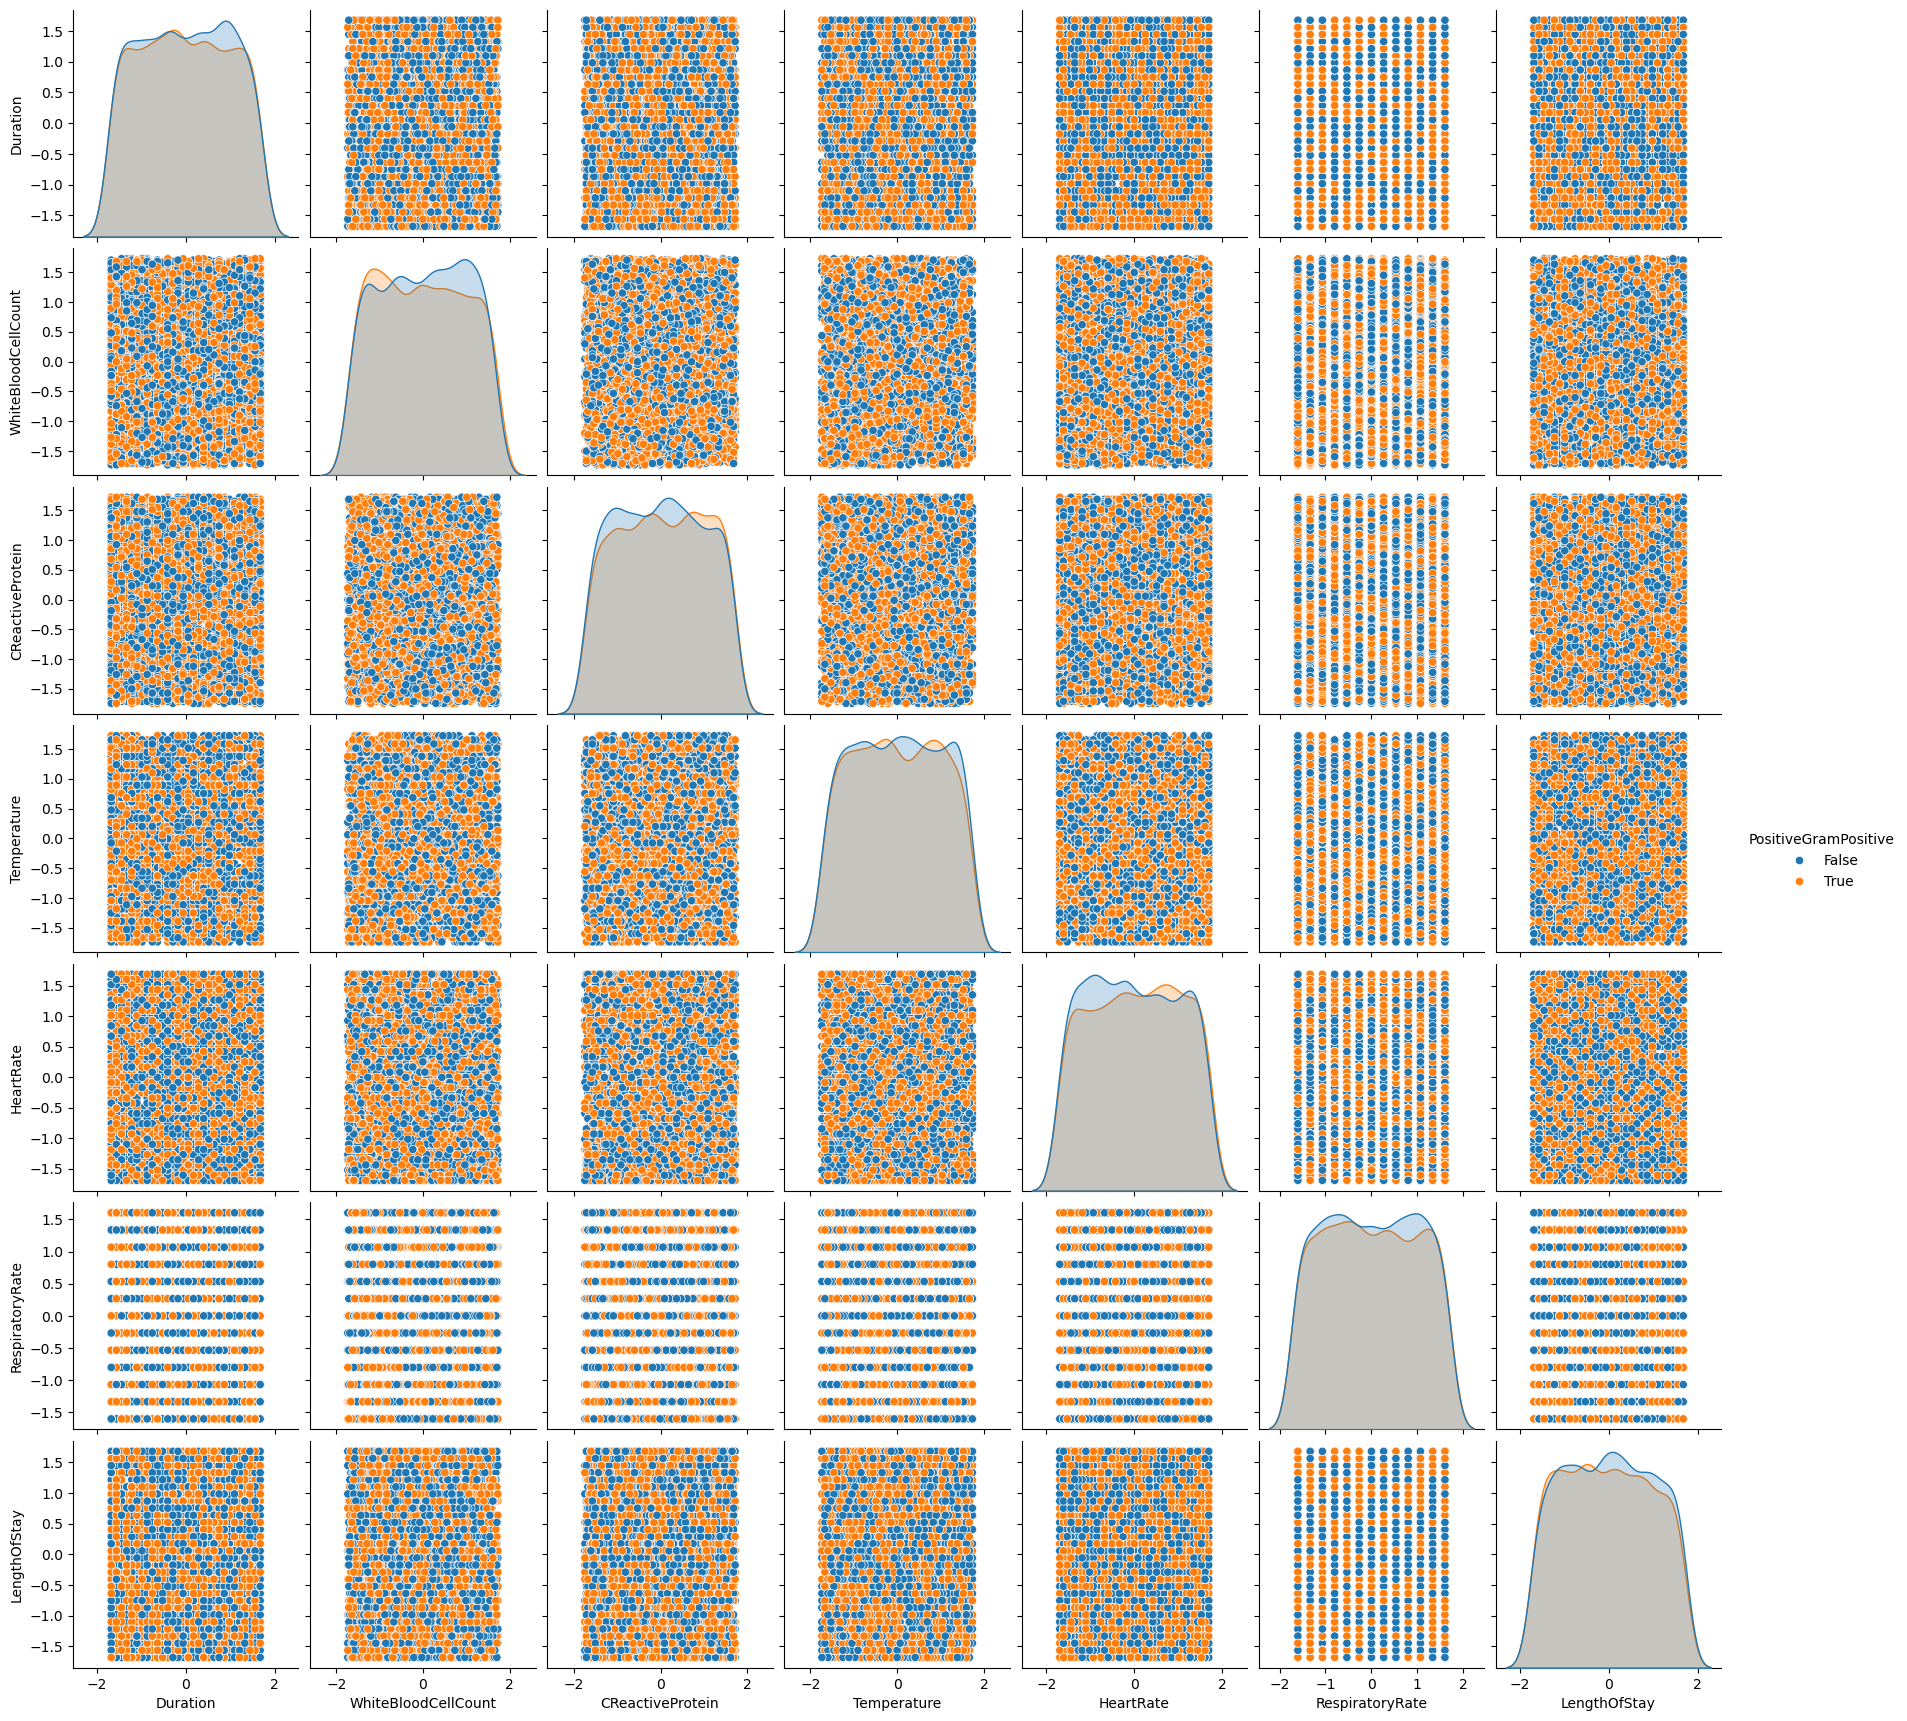

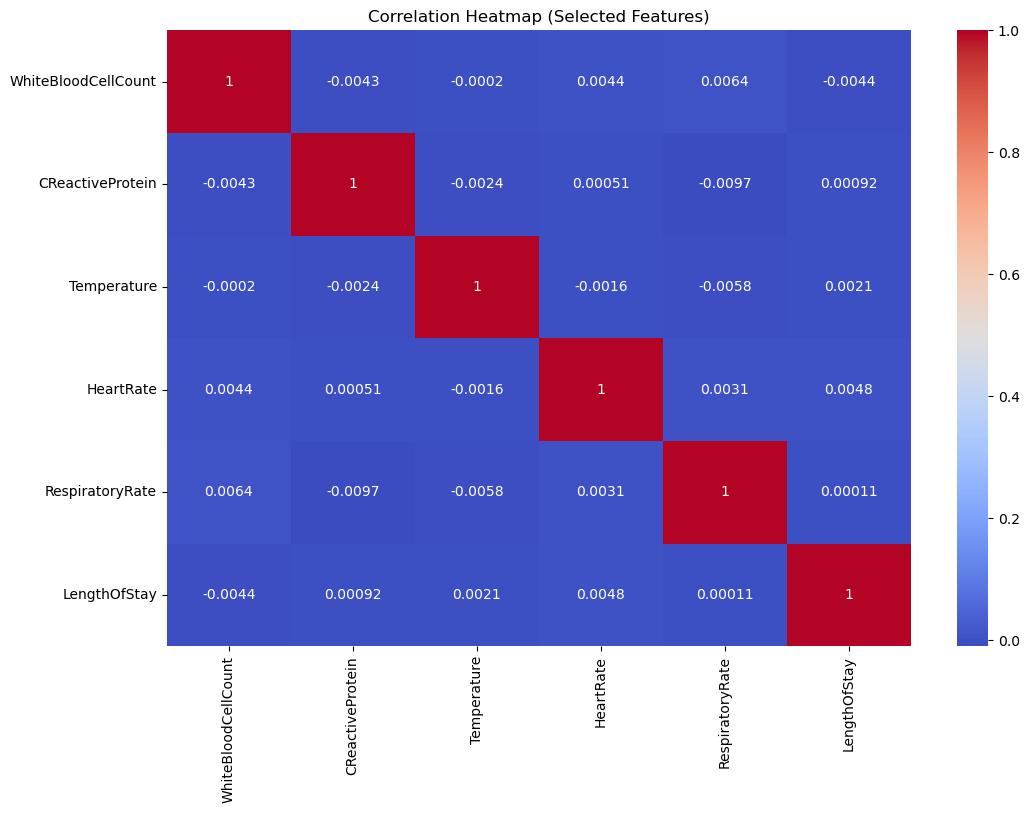

In [15]:
#3. Multivariate Analysis
# Pairplot for selected features
subset_cols = numerical_cols.intersection(data.columns) 
sampled_data = data.sample(n=min(5000, len(data)), random_state=42) 
sns.pairplot(sampled_data, hue='PositiveGramPositive', vars=subset_cols)
plt.show()

# Heatmap for Correlation
heatmap_cols = ['WhiteBloodCellCount', 'CReactiveProtein', 'Temperature', 
                'HeartRate', 'RespiratoryRate', 'LengthOfStay']  # Adjust based on your data
plt.figure(figsize=(12, 8))
sns.heatmap(data[heatmap_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Selected Features)")
plt.show()